# Trade income vs. Climate variability

**Hypothesis:** Settlements grow until they can take part in trading - this generates additional income. At a certain value of the Income from trade, this income must suffice to sustain the population of trading settlements.
At the verge of this parameter value, variability in the other sources of income can push settlements below the threshold for trading, leading to a cascading falure in the trade network.

To thest this, I vary the parameters for trade income and climate variability and see, if there is a value for the treade income that leads to big spreads in trajectories for different climate varability.

Ideally:
**Three variables: Trade strength[0, medium, high], Climate variability [0...high], Income from ecosystem services [high, normal, low]**

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

test = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X5_trade_revised/results/trajectory'
if test:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X5_trade_revised/results/traders_trajectory'
    
data = pd.read_pickle(location)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))
cls2 = cmap(np.linspace(0, 1, 5))

trade_strengths = lvs[1].values
print(trade_strengths)

Populating the interactive namespace from numpy and matplotlib
[  3000.   4000.   5000.   6000.   7000.   8000.   9000.  10000.]


In [2]:
def plotlines(data, level, key, unstack, cls, title=None, legend=True):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax1.set_title(title)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls, legend=legend)
    if legend:
        lg = ln.get_legend()
        bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
        xOffset = .5
        bb.x0 += xOffset
        bb.x1 += xOffset
        lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

In [3]:
data.head()

key                                                                                   mean_trajectories  \
precip_amplitude r_trade kill_cropless timesteps observables                                              
0.0              3000.0  False         0         es_income_agricultural_productivity           0.000000   
                                                 es_income_forest                           7021.036245   
                                                 es_income_pop_density                         0.000000   
                                                 es_income_precipitation                       0.000000   
                                                 es_income_waterflow                         792.672241   

key                                                                                   sigma_trajectories  
precip_amplitude r_trade kill_cropless timesteps observables                                              
0.0              3000.0  False         0         es_income_agricultural_productivity            0.000000  
                                                 es_income_forest                             475.392353  
                                                 es_income_pop_density                          0.000000  
                                                 es_income_precipitation                        0.000000  
                                                 es_income_waterflow                           77.247456

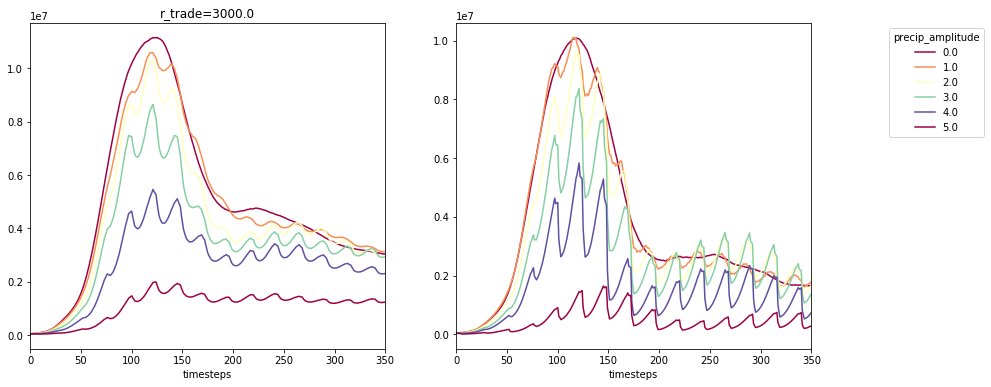

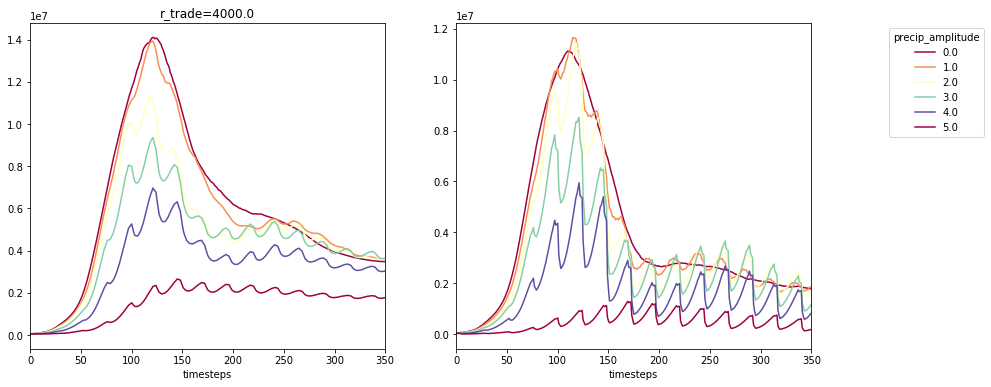

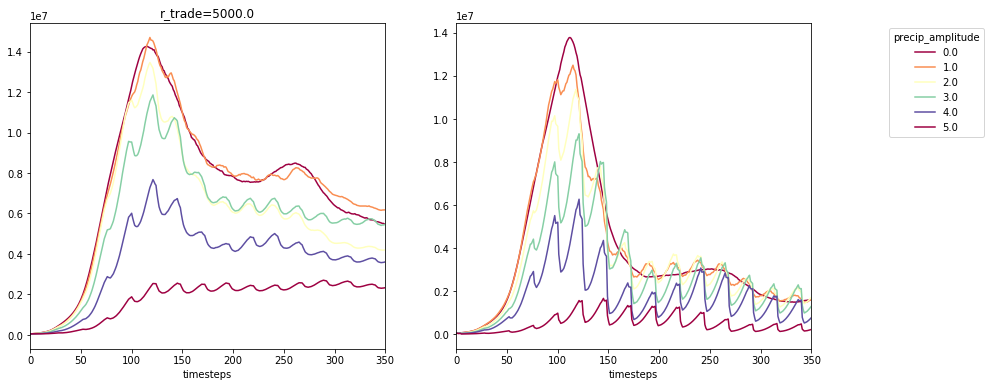

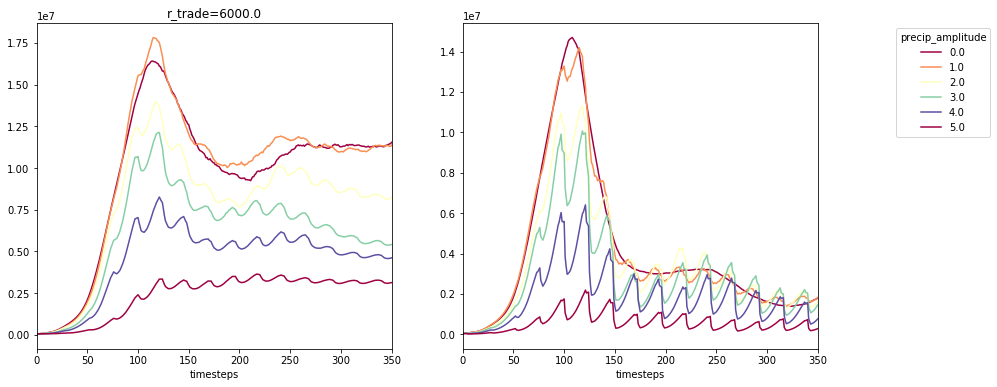

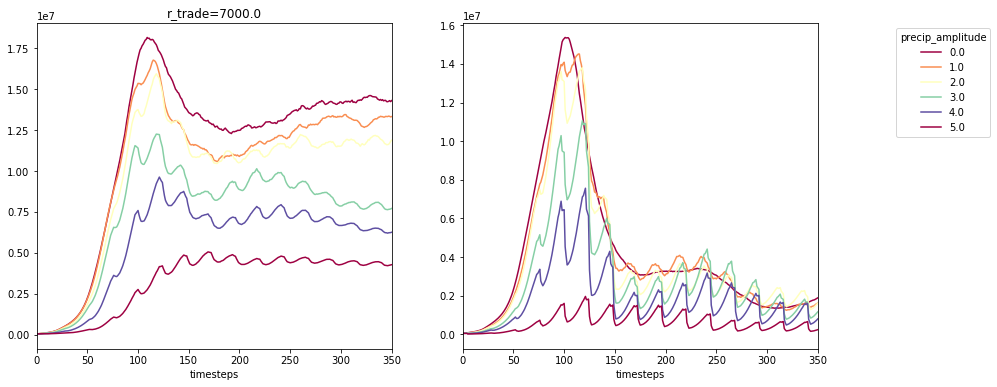

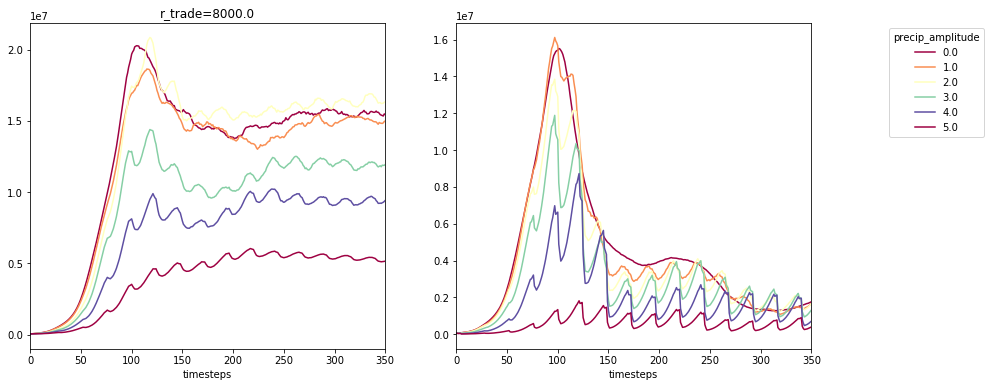

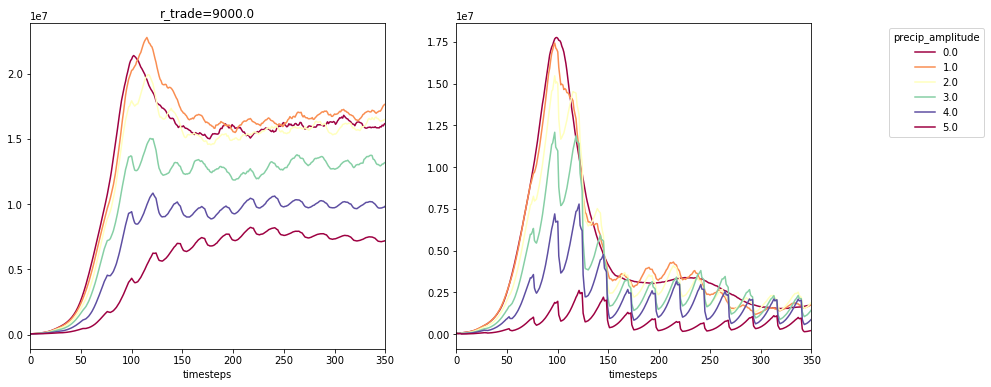

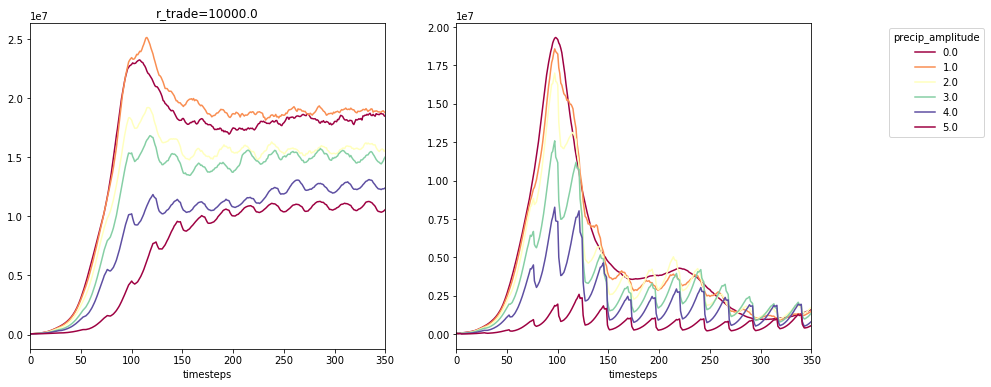

In [4]:
for ts in trade_strengths:
    key=[False, 'total_population', ts]
    level=['kill_cropless', 'observables', 'r_trade']
    unstack = ['precip_amplitude']
    title = 'r_trade={}'.format(ts)

    plotlines(data, level, key, unstack, cls=cls2, title=title)

Answer: for trade strength between 5000 and 10.000 the answer is no. There is no value that leads to diverging trajectories for different values of climate variability.
To clarify this picture, I will continue to test with lower values of trade income.

What one can observe in this experiment is the following: 
* *without killing of settlements without agriculture* the overshoot decreases with increasing income from trade,
* *with killing of settlements without agriculture* the overshot increases with increasing income from trade.


I suspect the reason behind this is, that in the first case, income from agriculture can be substituted with income from trade whereas in the second case, this is impossible.

To understand the situation better, lets check the underlying hypothesis, that decline in income from ecosystems and agriculture leads to brakdown of trade links which again leads to decline in income from trade:

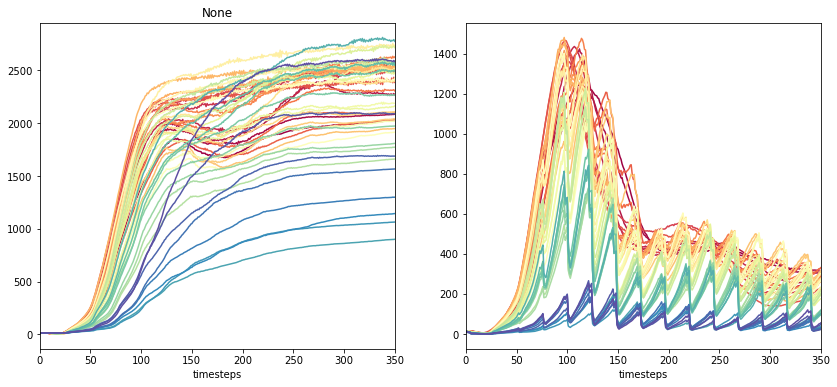

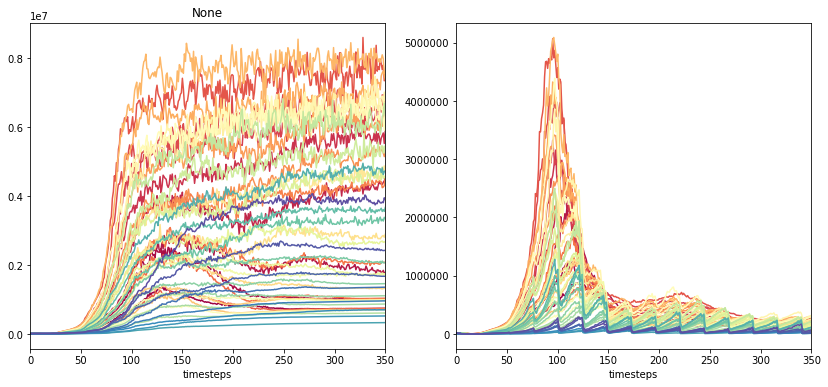

In [5]:
key=[False, 'total_trade_links']
level=['kill_cropless', 'observables']
unstack = ['r_trade', 'precip_amplitude']

plotlines(data, level, key, unstack, cls=cls, legend=False)

key=[False, 'total_income_trade']
level=['kill_cropless', 'observables']
unstack = ['r_trade', 'precip_amplitude']

plotlines(data, level, key, unstack, cls=cls, legend=False)

There is some variance in the income from trade, yet there is no observable decrease in the number of trade links.

**Hypothesis** When the *complex society* state is reached, the income from trade is enough to sustain the tradelinks. 

To test this: lower the value of trade further to see, whether at some point there is a breakdown in the 'live without agriculture' condition.

Another line of though was to check on the trading settlements especially. Therefore, I measured a number of quantities for trading settlements only.
One of them that I thought is especially interesting was the amount of outgoing migration. I thought, maybe in case of dwindling returns from agriculture, there is more people leaving the settlements, leading to breaking trade links. Lets have a look.

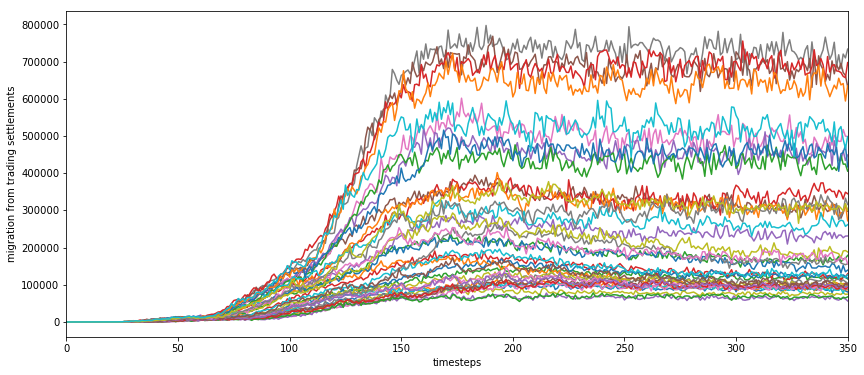

In [7]:
## location = '/home/jakob/Project_MayaSim/Python/output_data/X5_trade/results/traders_trajectory'
data = pd.read_pickle(location)
pt = data['mean_trajectories'].xs(level='kill_cropless', key=False)\
    .unstack('observables')['total_migrants']\
    .unstack(['r_trade', 'precip_amplitude']).plot(legend=False)

pt.set_ylabel('migration from trading settlements')

So, apparently, the outgoing migration is not related to the climate variability. On second thought, this totally makes sense, since the outmigration rate is only depending on the total income per capita which, as pointed out before, is pretty much independent from climating influences due to the strong impact of trade income (that is stable as long as population is stable) and a baseline income from ecosystem services, that agin does not heavily depend on the climate.

Compare this to the population of settlements:

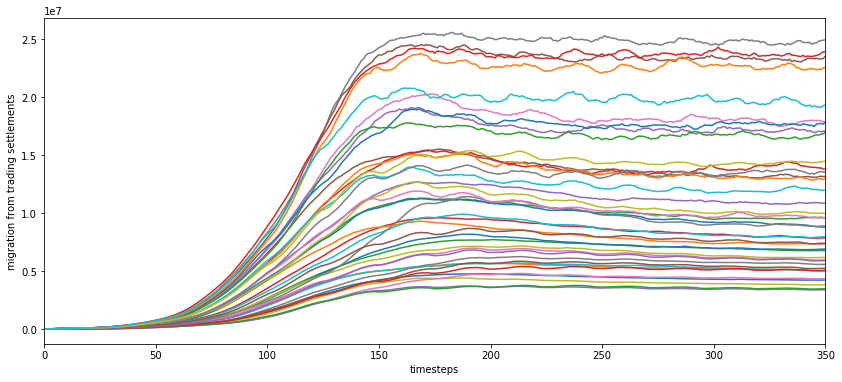

In [8]:
pt = data['mean_trajectories'].xs(level='kill_cropless', key=False)\
    .unstack('observables')['total_population']\
    .unstack(['r_trade', 'precip_amplitude']).plot(legend=False)
pt.set_ylabel('migration from trading settlements')

Ok, eyeballing this it looks like the outgoing migration is just relative to the settlements population with some noise. 

Which actually makes sense, since the migration rate is only depending on the population and the income per capita, which stays roughly constant, as we have seen before.